# Jupyter Notebook Examples

These examples use the Iris dataset which is commonly used in online tutorials (https://archive.ics.uci.edu/ml/datasets/Iris).


In [2]:
import matplotlib.pyplot as plt     # Matplotlib for low-level plot details
import numpy as np                  # NumPy for fast numeric operations
import pandas as pd                 # Pandas for datasets
import seaborn as sns               # Seaborn for easier plotting

# Machine learning tools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

sns.__version__

'0.12.2'

In [3]:
# Fetch the data from the UCI ML repository
# The UCI website is pretty specific:
# 1. Each dataset is in a subfolder
# 2. The data file name is {name}.data

base_uri="https://archive.ics.uci.edu/ml/machine-learning-databases"
file_path = f"{base_uri}/iris/iris.data"
# file_path = f"{base_uri}/00623/DATA.csv"
# There are no column headers in the data file so manually specify them here
iris_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
iris_df = pd.read_csv(file_path, names=iris_columns, index_col=False)


#set seed: students to add their own Student numbers here
seed = 123845

# Display details about the dataset
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
# List the first 20 records in the dataset
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
print(iris_df.head(n=20))

    sepal_length  sepal_width  petal_length  petal_width            class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


## Data Wrangling

### Notes
1. When working with Pandas axis=0 means a row operation and axis=1 means a column operation.
2. The a subset of columns can be selected by creating a list of names e.g. ['var1', 'var2'].

### Creating variables

In [4]:
# Example 1: Calculate petal area
iris_df["petal_area"] = iris_df["petal_length"] * iris_df["petal_width"]

# Example 2: Calculate mean sepal dimensions
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
sepal_names = ["sepal_length", "sepal_width"]
iris_df["sepal_mean"] = iris_df[sepal_names].mean(axis=1)

### Categorical data types

In [5]:
# Iris 'class' attribute is currently an 'object' but is really categorical
iris_df["flower_type"] = iris_df["class"].astype("category")

### Dropping variables

In [6]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
iris_df.drop("class", axis=1, inplace=True)
# This is equivalent to:
# iris_df.drop(columns=["class"], inplace=True)

# Dropping Observations/ rows of data

Say I want to make a sample selection/ filter the sample according to two conditions:
I would like to only look at samples that:
1.	Have a petal_length value >2.5 AND that have a petal_width value >1.5
2.	Have a (petal_length value >2.5 AND that have a petal_width value >1.5) OR petal_length value <2.5


In [7]:
iris_df_2=iris_df[(iris_df.petal_length > 2.5) & (iris_df.petal_width >1.5)].copy()
print(iris_df_2.head(n=20))

     sepal_length  sepal_width  petal_length  petal_width  petal_area  \
56            6.3          3.3           4.7          1.6        7.52   
70            5.9          3.2           4.8          1.8        8.64   
77            6.7          3.0           5.0          1.7        8.50   
83            6.0          2.7           5.1          1.6        8.16   
85            6.0          3.4           4.5          1.6        7.20   
100           6.3          3.3           6.0          2.5       15.00   
101           5.8          2.7           5.1          1.9        9.69   
102           7.1          3.0           5.9          2.1       12.39   
103           6.3          2.9           5.6          1.8       10.08   
104           6.5          3.0           5.8          2.2       12.76   
105           7.6          3.0           6.6          2.1       13.86   
106           4.9          2.5           4.5          1.7        7.65   
107           7.3          2.9           6.3       

In [8]:
iris_df_3=iris_df[((iris_df.petal_length > 2.5) & (iris_df.petal_width >1.5)) | iris_df.petal_length <2.5].copy()
print(iris_df_3.head(n=20))

    sepal_length  sepal_width  petal_length  petal_width  petal_area  \
0            5.1          3.5           1.4          0.2        0.28   
1            4.9          3.0           1.4          0.2        0.28   
2            4.7          3.2           1.3          0.2        0.26   
3            4.6          3.1           1.5          0.2        0.30   
4            5.0          3.6           1.4          0.2        0.28   
5            5.4          3.9           1.7          0.4        0.68   
6            4.6          3.4           1.4          0.3        0.42   
7            5.0          3.4           1.5          0.2        0.30   
8            4.4          2.9           1.4          0.2        0.28   
9            4.9          3.1           1.5          0.1        0.15   
10           5.4          3.7           1.5          0.2        0.30   
11           4.8          3.4           1.6          0.2        0.32   
12           4.8          3.0           1.4          0.1        

## Statistics

### Basic Descriptives

In [9]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
print(iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].describe())
# This produces the same output:
# print(iris_df.drop("flower_type", axis=1).describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Inter-quartile Range

In [10]:
# First: Calculate the quantile(s) required
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
# Note: Sepal width is not required but used to demonstrate multi-variable use
sepal_length_q25, sepal_width_q25 = iris_df[["sepal_length", "sepal_width"]].quantile(0.25, axis=0)
print(f"Sepal length 25th percentile: {sepal_length_q25}")
print(f"Sepal width 25th percentile: {sepal_width_q25}")
# Note: Also need 75th percentile for length to calculate IQR
sepal_length_q75 = iris_df["sepal_length"].quantile(0.75)
print(f"Sepal length 75th percentile: {sepal_length_q75}")

# Second: Calculate the IQR = Q75 - Q25
sepal_length_iqr = sepal_length_q75 - sepal_length_q25
print(f"Sepal length IQR: {sepal_length_iqr}")

Sepal length 25th percentile: 5.1
Sepal width 25th percentile: 2.8
Sepal length 75th percentile: 6.4
Sepal length IQR: 1.3000000000000007


### Counts / Frequency / Distribution

In [11]:
# How many of each Iris flower type are there?
print(iris_df["flower_type"].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: flower_type, dtype: int64


In [12]:
# What is the probability distribution for each flower type?
print(iris_df["flower_type"].value_counts(normalize=True))

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: flower_type, dtype: float64


In [13]:
# Cross tabulation
# Create indicators for sepal length and width above or below mean
iris_df["sepal_length_big"] = iris_df["sepal_length"]>iris_df["sepal_length"].mean()
iris_df["sepal_width_big"] = iris_df["sepal_width"]>iris_df["sepal_width"].mean()
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(iris_df["sepal_length_big"], iris_df["sepal_width_big"])

sepal_width_big,False,True
sepal_length_big,,
False,38,42
True,45,25


In [14]:
# Percentage cross tabulation defaults to percentage of all values
pd.crosstab(iris_df["sepal_length_big"], iris_df["sepal_width_big"], normalize=True)

sepal_width_big,False,True
sepal_length_big,,
False,0.253333,0.280000
True,0.300000,0.166667


In [15]:
# Change this by normalize parameter (see documentation)
pd.crosstab(iris_df["sepal_length_big"], iris_df["sepal_width_big"], normalize='columns')

sepal_width_big,False,True
sepal_length_big,,
False,0.457831,0.626866
True,0.542169,0.373134


### Correlation

In [16]:
# Mean sepal dimension and petal area
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
iris_df[["sepal_mean", "petal_area"]].corr()

,sepal_mean,petal_area
sepal_mean,1.000000,0.659683
petal_area,0.659683,1.000000


## Graphing

The Seaborn Tutorial (https://seaborn.pydata.org/tutorial.html) is very useful.

### Scatter Plots

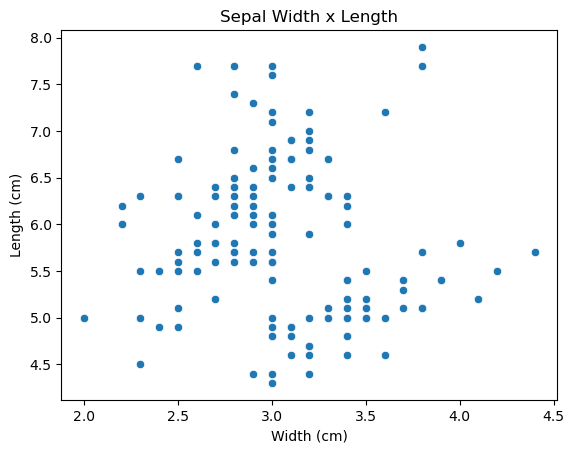

In [17]:
# Basic scatter plot
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# _ = ... is a loose convention meaning we don't care about the return value
# Without this Jupyter Notebook will list an object reference before the graph
_ = sns.scatterplot(data=iris_df, x="sepal_width", y="sepal_length")\
       .set(title="Sepal Width x Length", xlabel="Width (cm)", ylabel="Length (cm)")

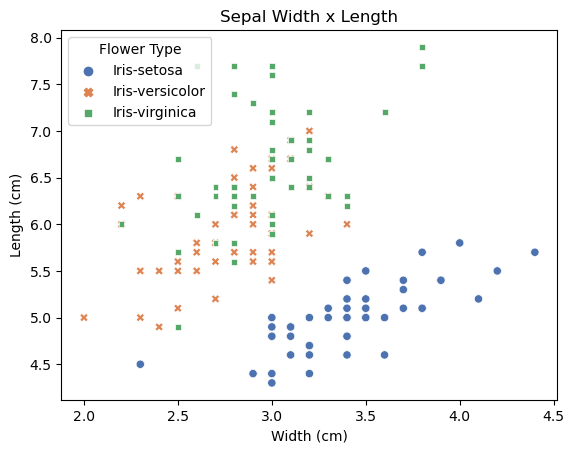

In [18]:
# Can also separate observations by flower types
# In this case the name of the graph variable is used but the return
# value of setting titles and axis labels is not important.
g = sns.scatterplot(data=iris_df, x="sepal_width", y="sepal_length",
                    hue="flower_type", style="flower_type", palette="deep")
_ = g.set(title="Sepal Width x Length", xlabel="Width (cm)", ylabel="Length (cm)")
_ = g.legend(title="Flower Type")

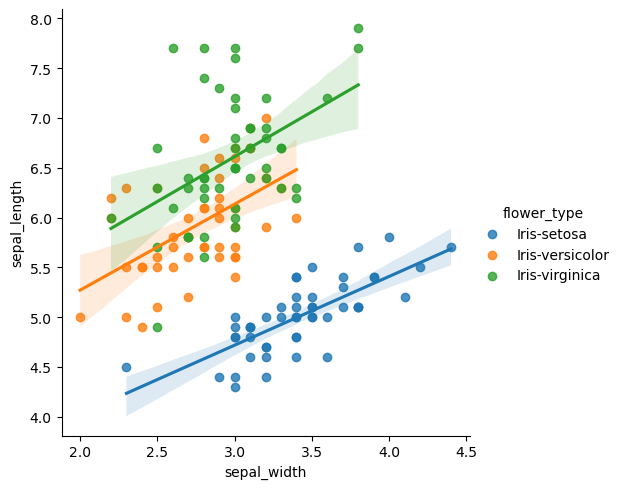

In [19]:
# Can plot linear regression lines automatically
# https://seaborn.pydata.org/generated/seaborn.lmplot.html
_ = sns.lmplot(data=iris_df, x="sepal_width", y="sepal_length", hue="flower_type")

### Histograms

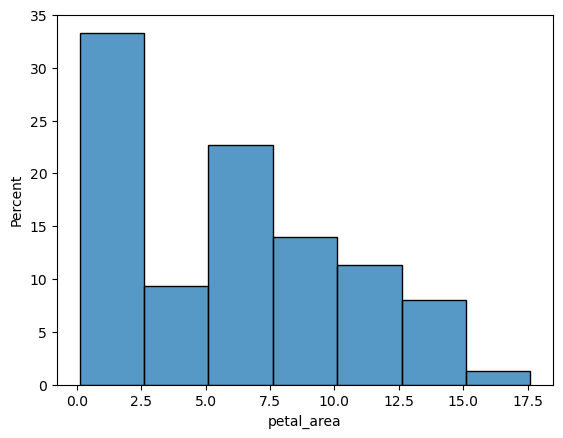

In [20]:
# Petal area percentages of 2.5cm-squared bins
# https://seaborn.pydata.org/generated/seaborn.histplot.html
_ = sns.histplot(data=iris_df, x="petal_area", binwidth=2.5, stat='percent')

### Lines

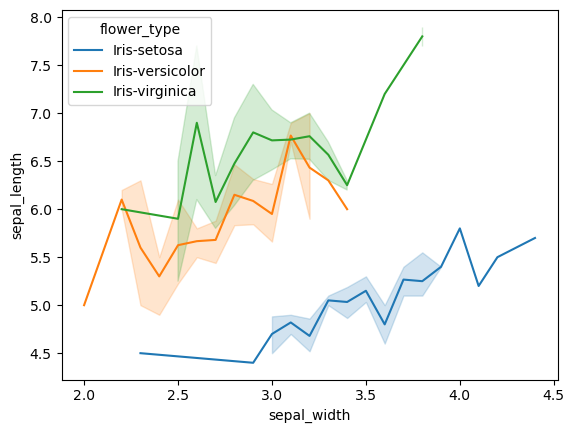

In [21]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
_ = sns.lineplot(data=iris_df, x="sepal_width", y="sepal_length", hue="flower_type")

### Kernel Density Estimates

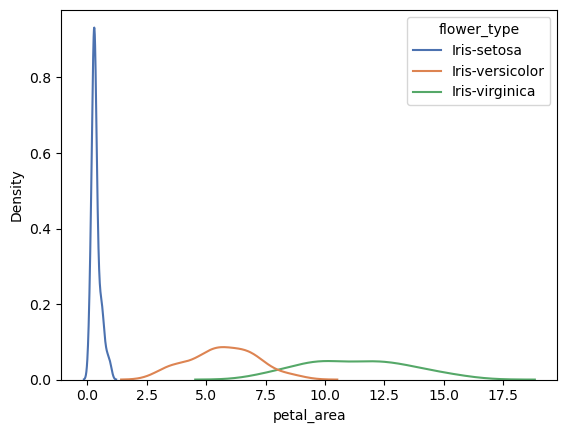

In [22]:
# One dimensional KDE
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
_ = sns.kdeplot(data=iris_df, x="petal_area", palette="deep", hue="flower_type")

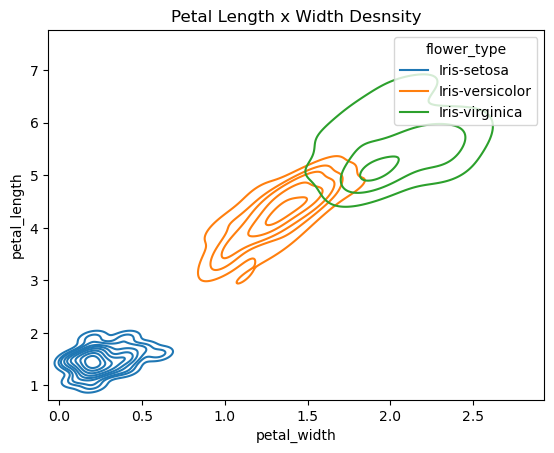

In [23]:
# Two dimensional KDE
_ = sns.kdeplot(data=iris_df, x="petal_width", y="petal_length", hue="flower_type")\
       .set(title="Petal Length x Width Desnsity")

### Multiple plots together

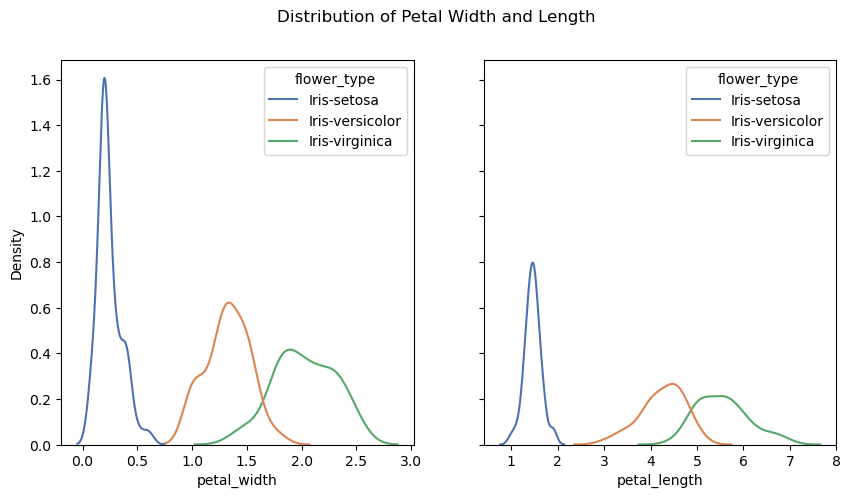

In [24]:
# Sub-figures need to be configured manually
# Uses the low-level features of matplotlib to create separate axes then plots onto them
figure, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
figure.suptitle("Distribution of Petal Width and Length")
_ = sns.kdeplot(data=iris_df, x="petal_width", hue="flower_type", palette="deep", ax=axes[0])
_ = sns.kdeplot(data=iris_df, x="petal_length", hue="flower_type", palette="deep", ax=axes[1])

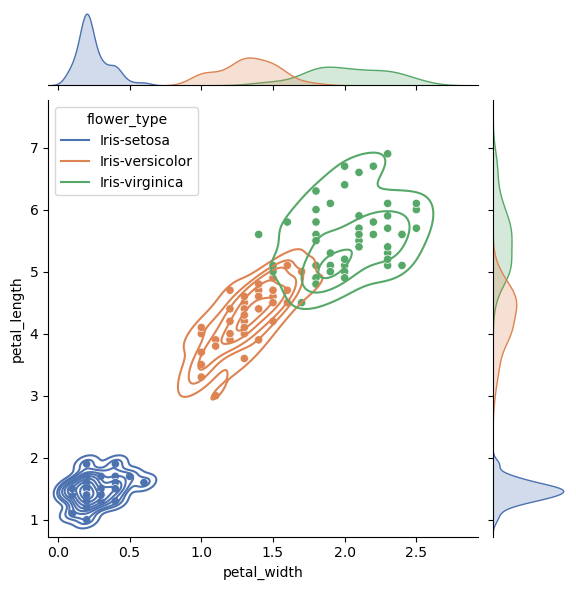

In [25]:
# Joint grids plot multiple forms of two variables
# https://seaborn.pydata.org/generated/seaborn.jointplot.html
g = sns.jointplot(data=iris_df, x="petal_width", y="petal_length", hue="flower_type", palette="deep")
_ = g.plot_joint(sns.kdeplot)

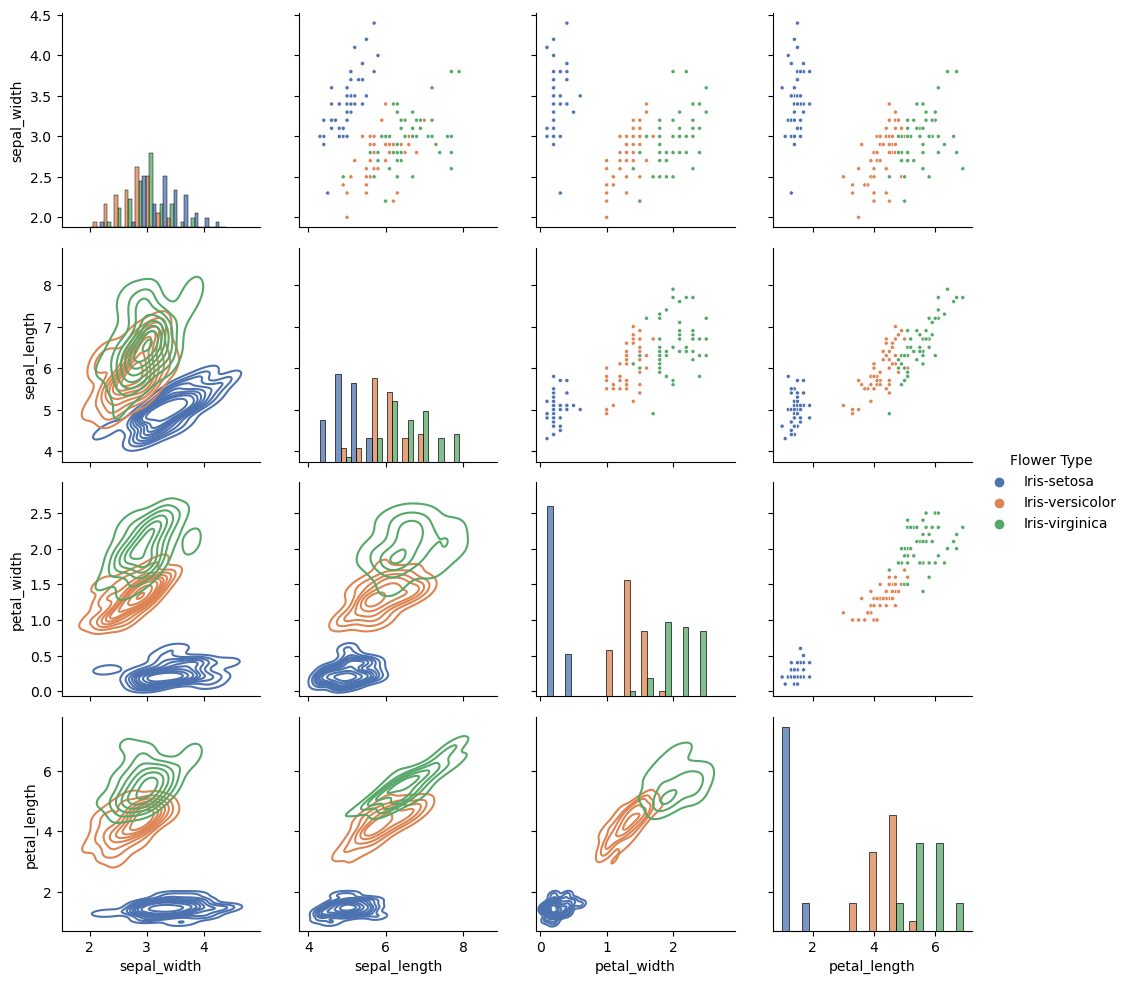

In [26]:
# Pair grids put X by Y of all variables in a data frame
# https://seaborn.pydata.org/generated/seaborn.PairGrid.html
# You can achieve something similar with sns.pairplot but with less functionality
g = sns.PairGrid(data=iris_df[["sepal_width", "sepal_length", "petal_width", "petal_length", "flower_type"]], hue="flower_type", palette="deep")
_ = g.map_diag(sns.histplot, multiple="dodge")
_ = g.map_lower(sns.kdeplot)
_ = g.map_upper(sns.scatterplot, marker='.')
_ = g.add_legend(title="Flower Type")

## Logistic Regression

_Note: Logistic regression is a classification task - predicting a flower type in this case. The regression in the name comes from the model using regression to estimate probabilities and then classify based on the highest probability._

The Iris dataset plots above show the _setosa_ are linearly separable from _versicolor_ and _virginica_ but that these are not.

This Logistic Regression example tried to separate _setosa_ from any other type (a binary classification task).

Classification only uses $petal\_width$ and $petal\_length$ so the decision boundary can be plotted.

In [27]:
# # Recode the flower types into the binary classes
# Y_TARGET = "setosa"
# iris_df[Y_TARGET] = iris_df["flower_type"].replace({"Iris-setosa": 1, "Iris-versicolor": 0, "Iris-virginica": 0})
# print(iris_df[Y_TARGET].value_counts())

The graphs above suggest petal dimensions will return good results so subset to just those features.

In [28]:
# # Training and Test Data
# X_FEATURES = ["petal_width", "petal_length"]
# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# # Setting random_state means the split will always be the same which sometimes is useful.
# X_train, X_test, y_train, y_test =\
#     train_test_split(iris_df[X_FEATURES], iris_df[Y_TARGET], test_size=0.3, random_state=seed, stratify=iris_df[Y_TARGET])

# # Output the dimensions of each of the sets
# print(f"X_train is {X_train.shape}")
# print(f"X_test is {X_test.shape}")
# print(f"y_train is {y_train.shape}")
# print(f"y_test is {y_test.shape}")

In [29]:
# # Logistic Regression
# # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# lr_model = LogisticRegression(max_iter=1000)
# lr_model.fit(X_train, y_train)
# y_predict = lr_model.predict(X_test)

In [30]:
# # Report performance of classifier
# # Note: This task achieves a perfect score
# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# print(classification_report(y_test, y_predict, target_names=["Other", "Setosa"]))

In [31]:
# # Plot the decision boundary
# # This assumes only TWO input features the X and Y in
# #    y = mx + c

# # The coefficients and intercepts applied to the X and Y
# #   wY*y = wX*x + b
# wX, wY = lr_model.coef_.T
# b = lr_model.intercept_[0]
# # Gradient and y-intercept for plotting (divide out wY)
# #   y = mx + c
# m = -wX/wY
# c = -b/wY

# # Find the minimum and maximum petal dimensions
# # Make sure X was first feature, Y was second feature
# xmin = iris_df[X_FEATURES[0]].min()
# xmax = iris_df[X_FEATURES[0]].max()
# ymin = iris_df[X_FEATURES[1]].min()
# ymax = iris_df[X_FEATURES[1]].max()

# # Calculate two points on the decision boundary
# x_boundary = np.array([xmin, xmax])
# y_boundary = m*x_boundary + c

# # Plot the data and a line along the boundary
# g = sns.scatterplot(data=iris_df, x="petal_width", y="petal_length", hue=Y_TARGET)
# g = sns.lineplot(x=x_boundary, y=y_boundary, color='red', linestyle='--')


Try using the exact same process to separate _versicolor_ and _virginica_ (after dropping _setosa_).

In [32]:
# # Create a temporary copy of the data with setosa dropped
# # Note: All iris_df have to be replaced with tmp_df in this block
# tmp_df = iris_df[iris_df["setosa"]==0].copy()
# # Recode the flower types into the binary classes
# Y_TARGET = "versicolor"
# tmp_df[Y_TARGET] = tmp_df["flower_type"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 0})
# print("== Distribution ==")
# print(tmp_df[Y_TARGET].value_counts())

# ## Training and Test Data
# X_FEATURES = ["petal_width", "petal_length"]
# X_train, X_test, y_train, y_test =\
#     train_test_split(tmp_df[X_FEATURES], tmp_df[Y_TARGET], test_size=0.3, random_state=seed, stratify=tmp_df[Y_TARGET])

# # Output the dimensions of each of the sets
# print("\n== Dimensions ==")
# print(f"X_train is {X_train.shape}")
# print(f"X_test is {X_test.shape}")
# print(f"y_train is {y_train.shape}")
# print(f"y_test is {y_test.shape}")

# # Logistic Regression
# lr_model = LogisticRegression(max_iter=1000)
# lr_model.fit(X_train, y_train)
# y_predict = lr_model.predict(X_test)

# # Report performance of classifier
# print("\n== Classification Report ==")
# print(classification_report(y_test, y_predict, target_names=["Virginica", "Versicolor"]))

# # Plot the decision boundary
# wX, wY = lr_model.coef_.T
# b = lr_model.intercept_[0]
# m = -wX/wY
# c = -b/wY
# xmin = tmp_df[X_FEATURES[0]].min()
# xmax = tmp_df[X_FEATURES[0]].max()
# ymin = tmp_df[X_FEATURES[1]].min()
# ymax = tmp_df[X_FEATURES[1]].max()
# x_boundary = np.array([xmin, xmax])
# y_boundary = m*x_boundary + c
# g = sns.scatterplot(data=tmp_df, x="petal_width", y="petal_length", hue=Y_TARGET)
# g = sns.lineplot(x=x_boundary, y=y_boundary, color='red', linestyle='--')


This has some errors so use a Receiver Operating Characteristic (ROC) to assess performance of _true-positive_ and _false-positive_ cases.

In [33]:
# # Calculate the ROC and area under the curve (AUC)
# class_probs = lr_model.predict_proba(X_test)
# prob_versicolor = class_probs[:, 1] # all rows, column 1 (2nd column)
# fp_rate, tp_rate, _ = roc_curve(y_test, prob_versicolor)
# roc_auc = auc(fp_rate, tp_rate)

# # Plot the ROC
# g = sns.lineplot(x=fp_rate, y=tp_rate)\
#        .set(title="ROC", xlabel="False Positive Rate", ylabel="True Positive Rate")
# g = sns.lineplot(x=[0, 1], y=[0, 1], color='r', linestyle='--')
# _ = g.legend(labels=[f"AUC = {roc_auc:0.4f}"])
# _ = sns.move_legend(g, "lower right")

## Decision Tree

The _versicolor_ and _virginica_ could not be linearly separated using only the petal dimensions.

This example uses a Decision Tree across sepal and petal dimensions to try and classify all three types.

In [34]:
# Create an integer coding for all three of the target classes
# https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
Y_TARGET = "flower_target"
iris_df[Y_TARGET] = iris_df["flower_type"].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})
# Training and Test Data
X_FEATURES = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Setting random_state means the split will always be the same which sometimes is useful.
X_train, X_test, y_train, y_test =\
    train_test_split(iris_df[X_FEATURES], iris_df[Y_TARGET], test_size=0.3, random_state=seed, stratify=iris_df[Y_TARGET])

# Output the dimensions of each of the sets
print(f"X_train is {X_train.shape}")
print(f"X_test is {X_test.shape}")
print(f"y_train is {y_train.shape}")
print(f"y_test is {y_test.shape}")

# Setup a Decision Tree 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt_model = DecisionTreeClassifier(criterion="gini", random_state=seed)
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)

# Report performance of classifier
print("\n== Classification Report ==")
print(classification_report(y_test, y_predict, target_names=["Setosa", "Versicolor", "Virginica"]))

X_train is (105, 4)
X_test is (45, 4)
y_train is (105,)
y_test is (45,)

== Classification Report ==
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.88      0.93      0.90        15
   Virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Using all four of the features means accuracy and decision boundaries are more complex one alternative is to plot the decision tree itself. In this figure $X[0]$ means the first input feature $sepal\_width$ and $X[3]$ means the fourth input feature $petal\_length$. The $value$ line is the count of instances in each of the three classes. The tree immediately classifies all of the first class (_setosa_) on the basis of $X[3]<=2.6$ i.e. petal_length less than or equal to 2.6cm.

X = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']


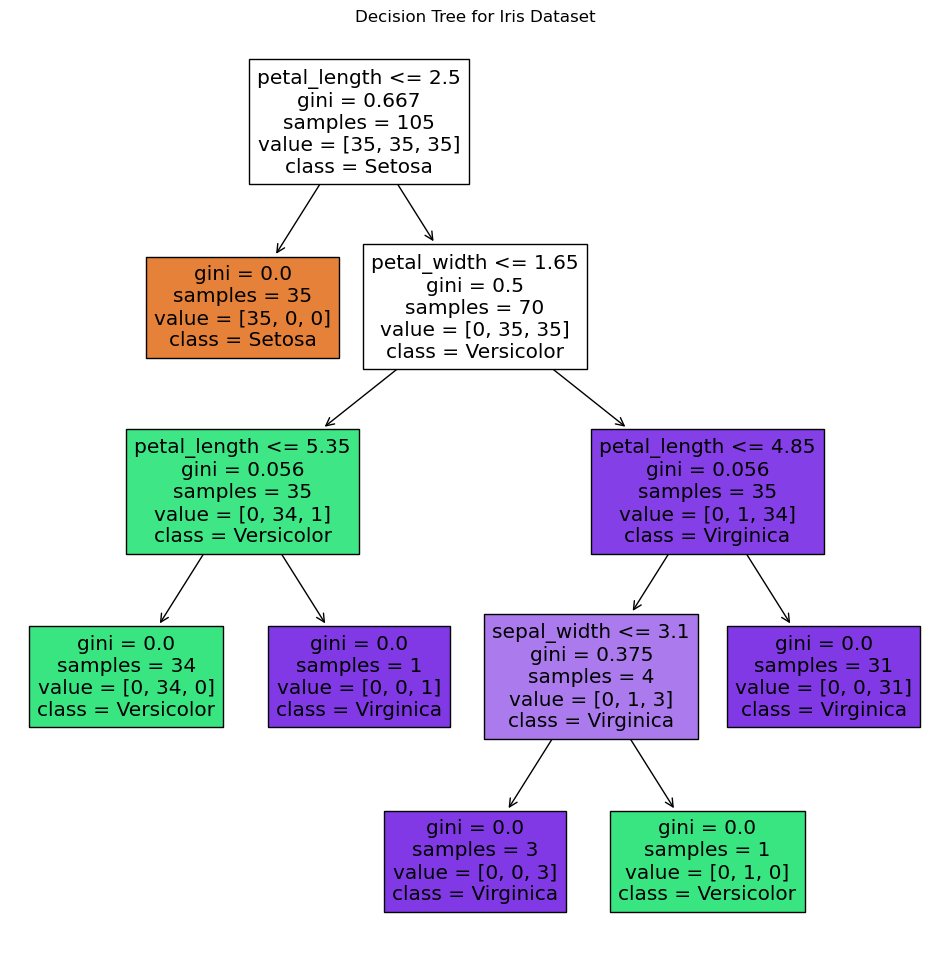

In [35]:
# Plot Decision Tree using the lower-level plotting functions
print(f"X = {X_FEATURES}")
plt.figure(figsize=(12,12))


_ = plot_tree(dt_model, filled=True, feature_names=X_FEATURES, class_names=["Setosa", "Versicolor", "Virginica"])
_ = plt.title("Decision Tree for Iris Dataset")

In [36]:
# Print 4dp of each feature importance 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i, feature in enumerate(X_FEATURES):
    print(f"{feature}: {dt_model.feature_importances_[i]:.4f}")

sepal_width: 0.0214
sepal_length: 0.0000
petal_width: 0.4445
petal_length: 0.5341
